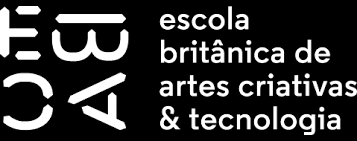

___

<center><h1>Exercício 02 - Módulo 24</h1></center>
<center><h1>GBM</h1></center>



## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

### Técnicas de Ensemble

Significa um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados.

**GBM:**

**Gradient Boosting Machine** (GBM) é uma técnica de aprendizado de máquina que cria um modelo preditivo poderoso a partir da combinação de vários modelos fracos (geralmente árvores de decisão). A ideia principal é adicionar modelos sequencialmente, cada um corrigindo os erros do anterior, utilizando o gradiente da função de perda (por isso o nome "Gradient Boosting"). Esse processo é iterativo e resulta em um modelo final forte.

#### 1. Diferenças entre AdaBoost e GBM:


- Método de atualização:
- 
**AdaBoost**: atualiza o peso de cada amostra na base de dados. Amostras mal classificadas recebem pesos maiores na próxima iteração. <br>
**GBM**: constrói novas árvores que corrigem os erros residuais das árvores anteriores com base no gradiente da função de perda.

- Tipo de perda:

**AdaBoost**: minimiza o erro de classificação através de uma ponderação simples dos erros. <br>
**GBM**: minimiza uma função de perda diferenciável (como erro quadrático ou log-likelihood) utilizando o gradiente descendente.

- Complexidade dos modelos:

**AdaBoost**: geralmente, usa árvores rasas (stumps) como modelos fracos. <br>
**GBM**: pode usar árvores profundas ou rasas como modelos fracos, dependendo da configuração.

- Robustez a ruído:

**AdaBoost**: mais sensível a ruído, pois dá peso elevado a outliers que foram mal classificados. <br>
**GBM**: tem maior controle sobre o ajuste fino, evitando overfitting com técnicas como regularização, tornando-o mais robusto.

- Regularização:

**AdaBoost**: não possui técnicas internas de regularização. <br>
**GBM**: inclui métodos de regularização como learning_rate e subsample para reduzir overfitting.


______

#### 2. Exemplificando com o código:

Exemplos de classificação e regressão usando GBM

In [15]:
# Importação das bibliotecas necessárias:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification, make_regression

# Exemplo de Classificação com GBM:
# Criação de dados de classificação fictícios
X_class, y_class = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Modelo de GBM para Classificação:
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train_class, y_train_class)

# Avaliação:
y_pred_class = gbm_classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Acurácia do modelo de classificação: {accuracy:.4f}')

# Exemplo de Regressão com GBM:
# Criação de dados de regressão fictícios
X_regr, y_regr = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, y_regr, test_size=0.3, random_state=42)

# Modelo de GBM para Regressão:
gbm_regressor = GradientBoostingRegressor(random_state=42)
gbm_regressor.fit(X_train_regr, y_train_regr)

# Avaliação
y_pred_regr = gbm_regressor.predict(X_test_regr)
mse = mean_squared_error(y_test_regr, y_pred_regr)
print(f'MSE do modelo de regressão: {mse:.4f}')


Acurácia do modelo de classificação: 0.8700
MSE do modelo de regressão: 3380.6198


______

#### 3. Cinco hiperparâmetros importantes no GBM:

- **n_estimators**: Número de árvores (modelos fracos) no ensemble. Aumentar esse valor pode aumentar a precisão, mas pode levar ao overfitting.
- **learning_rate**: Taxa de aprendizado que controla o impacto de cada árvore no modelo final. Valores mais baixos necessitam de mais árvores, mas podem melhorar a generalização.
- **max_depth**: Profundidade máxima das árvores. Controla a complexidade do modelo. Profundidades maiores podem levar ao overfitting.
- **subsample**: Proporção de amostras a serem usadas para cada árvore. Menores valores introduzem aleatoriedade, ajudando a evitar overfitting.
- **min_samples_split**: Número mínimo de amostras necessárias para dividir um nó. Controla a divisão e ajuda a regularizar o modelo.

______

#### 4. GridSearch para Encontrar os Melhores Hyperparâmetros:

GridSearchCV para encontrar os melhores parâmetros para GBM.

In [22]:
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros a serem ajustados:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Aplicando o GridSearch no modelo de classificação:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)

# Melhor modelo encontrado:
print("Melhores parâmetros para Classificação:", grid_search.best_params_)
print(f"Acurácia no teste com os melhores parâmetros: {grid_search.score(X_test_class, y_test_class):.4f}")


Melhores parâmetros para Classificação: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Acurácia no teste com os melhores parâmetros: 0.8667


### Visualização dos dados:

Vamos visualizar gráficos e tabelas que mostrem o desempenho do modelo ao longo dos diferentes hiperparâmetros:

                                               params  mean_test_score
0   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.910000
1   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.917143
2   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.914286
3   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.914286
4   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.911429
5   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.908571
6   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.914286
7   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.910000
8   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.911429
9   {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.890000
10  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.908571
11  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...         0.894286
12  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...         0.905714
13  {'

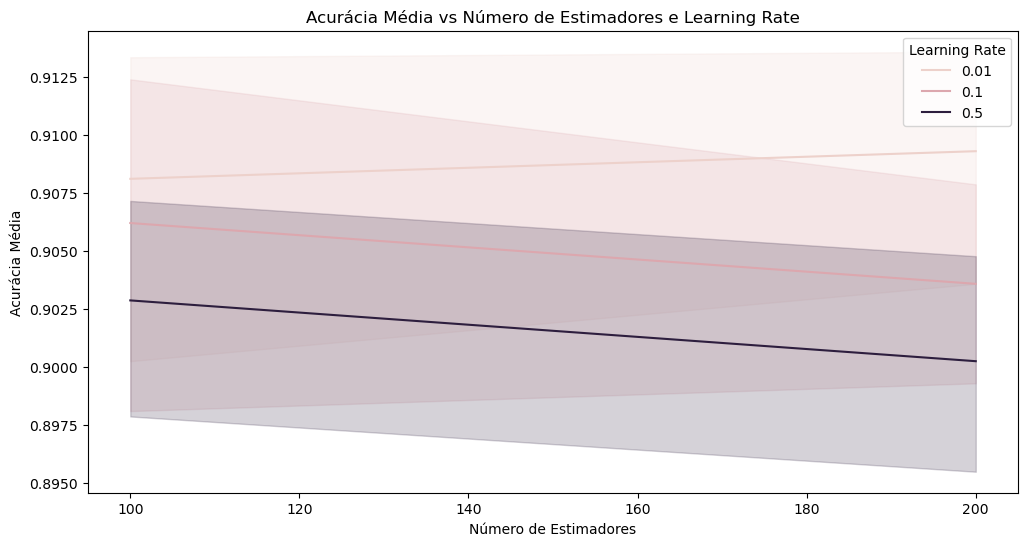

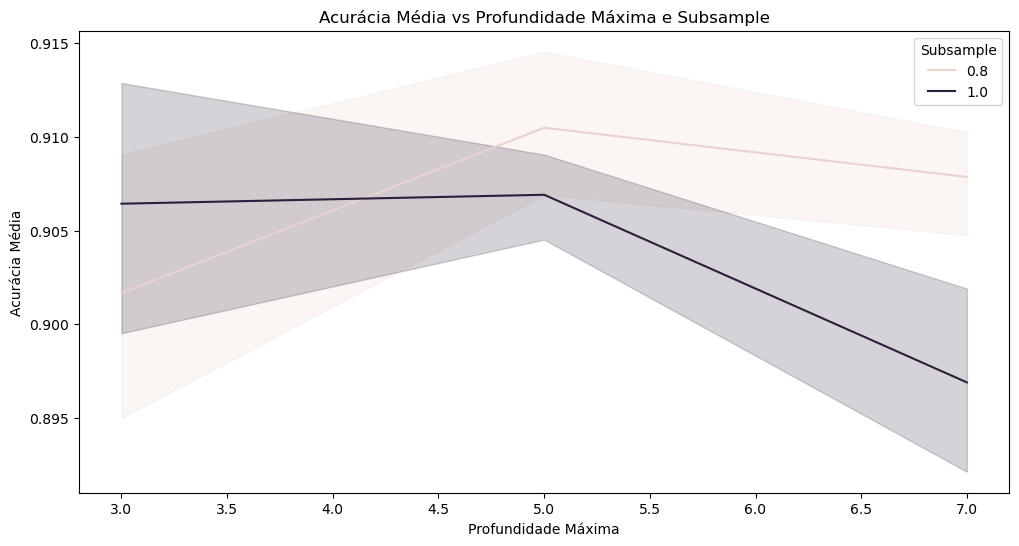

Top 5 melhores combinações de hiperparâmetros:
                                               params  mean_test_score
16  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.918571
1   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.917143
2   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.914286
3   {'learning_rate': 0.01, 'max_depth': 3, 'n_est...         0.914286
6   {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.914286


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #Eliminando mensagens e deixando o código mais limpo

# Converter os resultados do GridSearchCV para um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Visualizar os hiperparâmetros testados e a acurácia média obtida
print(results[['params', 'mean_test_score']])

# Plotando o desempenho ao longo do número de estimadores e da taxa de aprendizado (learning rate)
plt.figure(figsize=(12, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', data=results)
plt.title('Acurácia Média vs Número de Estimadores e Learning Rate')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia Média')
plt.legend(title='Learning Rate')
plt.show()

# Plotando o desempenho ao longo da profundidade máxima (max_depth) e da taxa de amostragem (subsample)
plt.figure(figsize=(12, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_subsample', data=results)
plt.title('Acurácia Média vs Profundidade Máxima e Subsample')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia Média')
plt.legend(title='Subsample')
plt.show()

# Tabelas dos melhores parâmetros e suas respectivas acurácias
top_results = results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)
print("Top 5 melhores combinações de hiperparâmetros:")
print(top_results)


### Verificando Overfitting:

In [38]:
# Aplicando o GridSearch no modelo de classificação com return_train_score=True:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_class, y_train_class)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             return_train_score=True, scoring='accuracy')

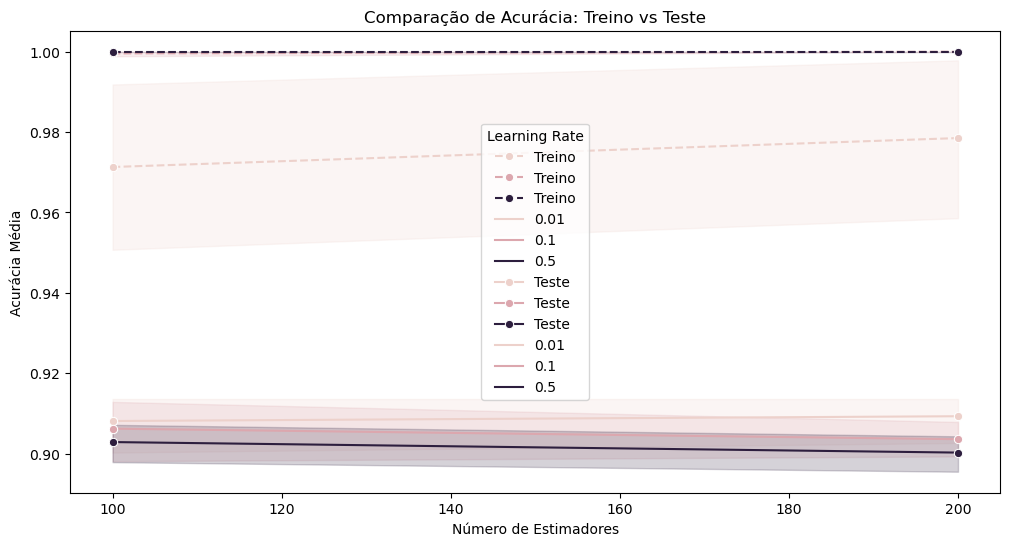

In [47]:
# Converter os resultados do GridSearchCV para um DataFrame:
results = pd.DataFrame(grid_search.cv_results_)

# Comparando desempenho em treino e validação (ou teste):
plt.figure(figsize=(12, 6))

# Acurácia no treino:
sns.lineplot(x='param_n_estimators', y='mean_train_score', hue='param_learning_rate', data=results, marker='o', label='Treino', linestyle='--')

# Acurácia no teste:
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', data=results, marker='o', label='Teste')

plt.title('Comparação de Acurácia: Treino vs Teste')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia Média')
plt.legend(title='Learning Rate')
plt.show()


### Análises:

Aplicando o modelo, verificamos a ausência de overfittings. O gráfico mostra as acurácias no treino e no teste para diferentes valores de n_estimators e learning_rate. 

______

#### 5. Diferença entre Stochastic e Stochastic GBM:

- **Stochastic Gradient Boosting**: refere-se ao uso de amostras aleatórias (via subsample < 1.0) de dados de treino em cada iteração do Gradient Boosting. Isso adiciona uma camada de aleatoriedade ao modelo, ajudando a reduzir o overfitting.

- **Stochastic Gradient Boosting Machine (GBM)**: no contexto tradicional, o GBM pode ser estocástico se configurado para usar amostras aleatórias (via subsample). A principal diferença está no método de amostragem dos dados, enquanto os conceitos gerais de boosting e ajuste do gradiente permanecem os mesmos.

Em resumo, a maior diferença está no uso da amostragem aleatória em cada iteração no Stochastic GBM, o que ajuda a reduzir overfitting e melhora a generalização.

______

#### Documentação pesquisada:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://pedroazambuja.medium.com/adaboost-adaptive-boosting-dbbec150fced
- https://pt.wikipedia.org/wiki/AdaBoost
- https://scikit-learn.org/stable/modules/ensemble.html
- https://jerryfriedman.su.domains/ftp/stobst.pdf

______